In [185]:
import collections
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [186]:
# read in data
data = pd.read_csv('NewYork.csv')

In [187]:
# Describe the data
data.describe()
# print(list(data.columns))

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights,availability_30,number_of_reviews,review_scores_rating,reviews_per_month
count,4.431700e+04,44317.000000,44317.000000,44317.000000,44173.000000,44244.000000,44226.000000,549.000000,44317.000000,44317.000000,44317.000000,4.431700e+04,44317.000000,44317.000000,34218.000000,34843.000000
mean,1.149792e+07,40.730049,-73.954700,2.813255,1.132739,1.158892,1.555895,727.732240,147.675948,1.482388,4.008665,6.421371e+04,5.904484,18.145836,93.487492,1.446368
std,6.494719e+06,0.053905,0.042382,1.853114,0.412206,0.721120,1.071849,633.253518,209.138888,1.090597,12.574811,1.049199e+07,9.099126,33.066623,8.209607,1.638707
min,2.515000e+03,40.499794,-74.253269,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,20.000000,0.010000
25%,6.029332e+06,40.691219,-73.983490,2.000000,1.000000,1.000000,1.000000,325.000000,70.000000,1.000000,1.000000,2.900000e+01,0.000000,1.000000,90.000000,0.270000
50%,1.226806e+07,40.723624,-73.956728,2.000000,1.000000,1.000000,1.000000,700.000000,105.000000,1.000000,2.000000,1.125000e+03,0.000000,5.000000,96.000000,0.870000
75%,1.736896e+07,40.764029,-73.939366,4.000000,1.000000,1.000000,2.000000,925.000000,175.000000,2.000000,4.000000,1.125000e+03,9.000000,20.000000,100.000000,2.100000
max,2.117803e+07,40.909174,-73.710126,16.000000,15.500000,14.000000,40.000000,5000.000000,10000.000000,16.000000,1250.000000,2.147484e+09,30.000000,489.000000,100.000000,24.530000


# Data cleansing

(-1.1019296620684242,
 1.1089713385687547,
 -1.1215025656294224,
 1.1010239316966393)

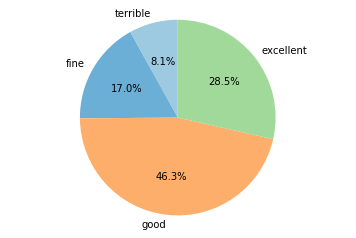

In [188]:
# pie
tmp  = data['review_scores_rating']
not_nan = tmp[tmp>0]
labels = 'terrible','fine','good','excellent'
terrible = len(tmp[tmp<=80])  # rate<=80
fine = len(tmp[tmp<=90])-terrible # 80 < rate <= 90
good = len(tmp[tmp<100]) - terrible - fine # 95 < rate < 100
excellent = len(tmp[tmp==100]) # rate = 100
sizes = [terrible, fine, good, excellent]
cmap = plt.get_cmap("tab20c")
colors = cmap(np.array([2, 1,6,10]))
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct = '%1.1f%%',shadow=False, startangle = 90,colors = colors)
ax1.axis('equal')

In [189]:
data.keys()
data

,id,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,neighbourhood_cleansed,latitude,longitude,is_location_exact,property_type,...,maximum_nights,calendar_updated,availability_30,number_of_reviews,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,reviews_per_month
0,18461891,NaN,NaN,f,t,Ditmars Steinway,40.774142,-73.916246,t,Apartment,...,6,5 months ago,0,0,NaN,f,f,strict,f,NaN
1,20702398,within an hour,100%,f,t,City Island,40.849191,-73.786509,f,House,...,21,2 weeks ago,19,2,100.0,f,f,moderate,f,2.00
2,6627449,within an hour,100%,f,t,City Island,40.849775,-73.786609,t,Apartment,...,21,2 weeks ago,28,21,95.0,f,f,strict,f,0.77
3,19949243,within a few hours,100%,f,t,City Island,40.848838,-73.782276,f,Boat,...,1125,6 days ago,30,0,NaN,t,f,strict,f,NaN
4,1886820,NaN,NaN,f,t,City Island,40.841144,-73.783052,t,House,...,90,16 months ago,30,0,NaN,f,f,strict,f,NaN
5,5557381,within an hour,100%,t,t,City Island,40.850024,-73.789328,t,House,...,1125,a week ago,0,94,97.0,t,f,moderate,f,3.27
6,19609887,within an hour,100%,f,t,City Island,40.851980,-73.789304,t,Apartment,...,1125,a week ago,24,3,100.0,f,f,flexible,f,1.58
7,7949480,within an hour,100%,t,t,City Island,40.852054,-73.788680,t,House,...,7,4 days ago,29,31,100.0,f,f,moderate,t,1.49
8,21057372,within a few hours,100%,f,t,City Island,40.842124,-73.785197,f,Boat,...,1125,3 days ago,29,0,NaN,t,f,strict,f,NaN
9,16042478,NaN,NaN,f,t,City Island,40.853491,-73.788607,t,Apartment,...,29,11 months ago,30,0,NaN,t,f,flexible,f,NaN


Id, neighbourhood_cleansed, host_has_profile_pic,
latitude
longitude
square_feet
guests_included
maximum_nights
calendar_updated
require_guest_profile_picture
is_business_travel_ready
reviews_per_month
review_scores_rating


In [190]:
data = data.drop(['id','neighbourhood_cleansed','host_has_profile_pic', 'latitude', 'longitude', 'square_feet', 'guests_included',
          'maximum_nights', 'calendar_updated', 'require_guest_profile_picture', 'is_business_travel_ready',
          'reviews_per_month', 'review_scores_rating'], axis = 1)


In [191]:
data

,host_response_time,host_response_rate,host_is_superhost,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,availability_30,number_of_reviews,instant_bookable,cancellation_policy
0,NaN,NaN,f,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",110,6,0,0,f,strict
1,within an hour,100%,f,f,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Air conditioning"",Kitche...",50,1,19,2,f,moderate
2,within an hour,100%,f,t,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air conditio...",125,3,28,21,f,strict
3,within a few hours,100%,f,f,Boat,Entire home/apt,4,1.0,1.0,3.0,Real Bed,{},100,3,30,0,t,strict
4,NaN,NaN,f,t,House,Entire home/apt,4,3.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",300,7,30,0,f,strict
5,within an hour,100%,t,t,House,Private room,4,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air conditionin...",69,3,0,94,t,moderate
6,within an hour,100%,f,t,Apartment,Entire home/apt,7,1.0,2.0,5.0,Real Bed,"{TV,""Air conditioning"",Kitchen,""Free parking o...",150,2,24,3,f,flexible
7,within an hour,100%,t,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Cable TV"",""Wireless Internet"",""Air condition...",101,1,29,31,f,moderate
8,within a few hours,100%,f,f,Boat,Entire home/apt,4,1.5,2.0,2.0,Real Bed,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",100,1,29,0,t,strict
9,NaN,NaN,f,t,Apartment,Private room,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air conditio...",200,7,30,0,t,flexible


In [192]:
for key in data:
    data = data[pd.notnull(data[key])]

In [193]:
data

,host_response_time,host_response_rate,host_is_superhost,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,minimum_nights,availability_30,number_of_reviews,instant_bookable,cancellation_policy
1,within an hour,100%,f,f,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Air conditioning"",Kitche...",50,1,19,2,f,moderate
2,within an hour,100%,f,t,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air conditio...",125,3,28,21,f,strict
3,within a few hours,100%,f,f,Boat,Entire home/apt,4,1.0,1.0,3.0,Real Bed,{},100,3,30,0,t,strict
5,within an hour,100%,t,t,House,Private room,4,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air conditionin...",69,3,0,94,t,moderate
6,within an hour,100%,f,t,Apartment,Entire home/apt,7,1.0,2.0,5.0,Real Bed,"{TV,""Air conditioning"",Kitchen,""Free parking o...",150,2,24,3,f,flexible
7,within an hour,100%,t,t,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Cable TV"",""Wireless Internet"",""Air condition...",101,1,29,31,f,moderate
8,within a few hours,100%,f,f,Boat,Entire home/apt,4,1.5,2.0,2.0,Real Bed,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",100,1,29,0,t,strict
10,within an hour,100%,t,f,House,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",125,2,18,60,f,moderate
11,a few days or more,33%,f,t,Apartment,Entire home/apt,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",115,3,0,49,t,strict
12,within an hour,100%,f,t,House,Entire home/apt,4,2.0,3.0,3.0,Real Bed,"{""Wireless Internet"",""Air conditioning"",Kitche...",62,2,19,9,f,moderate


In [194]:
data.host_response_time.unique()

array(['within an hour', 'within a few hours', 'a few days or more',
       'within a day'], dtype=object)

In [195]:
data['host_response_time'] = data['host_response_time'].map({'within an hour': 1, 'within a few hours': 2, 
                                                            'a few days or more': 4, 'within a day': 3})

In [196]:
data.dtypes

host_response_time       int64
host_response_rate      object
host_is_superhost       object
is_location_exact       object
property_type           object
room_type               object
accommodates             int64
bathrooms              float64
bedrooms               float64
beds                   float64
bed_type                object
amenities               object
price                    int64
minimum_nights           int64
availability_30          int64
number_of_reviews        int64
instant_bookable        object
cancellation_policy     object
dtype: object

In [197]:
def p2f(x):
    return float(x.strip('%'))/100

In [198]:
data['host_response_rate'] = data['host_response_rate'].apply(p2f)

In [199]:
data['host_is_superhost'] = data['host_is_superhost'].map({'f': 0, 't': 1})

In [200]:
data['is_location_exact'] = data['is_location_exact'].map({'f': 0, 't': 1})

In [201]:
data.property_type.unique()

array(['House', 'Apartment', 'Boat', 'Townhouse', 'Condominium', 'Dorm',
       'Earth House', 'Other', 'Bed & Breakfast', 'Loft', 'Guesthouse',
       'Guest suite', 'Bungalow', 'Timeshare', 'Hostel', 'Chalet',
       'Vacation home', 'In-law', 'Treehouse', 'Serviced apartment',
       'Villa', 'Yurt', 'Cabin', 'Boutique hotel', 'Castle', 'Train'],
      dtype=object)

In [202]:
collections.Counter(data['property_type'])

Counter({'House': 3159,
         'Apartment': 24762,
         'Boat': 9,
         'Townhouse': 720,
         'Condominium': 477,
         'Dorm': 24,
         'Earth House': 3,
         'Other': 233,
         'Bed & Breakfast': 110,
         'Loft': 656,
         'Guesthouse': 56,
         'Guest suite': 52,
         'Bungalow': 18,
         'Timeshare': 74,
         'Hostel': 38,
         'Chalet': 3,
         'Vacation home': 7,
         'In-law': 6,
         'Treehouse': 1,
         'Serviced apartment': 7,
         'Villa': 20,
         'Yurt': 1,
         'Cabin': 2,
         'Boutique hotel': 20,
         'Castle': 1,
         'Train': 1})

In [203]:
data['property_type'] = data['property_type'].map({'House': 1, 'Apartment': 1, 'Townhouse': 1, 'Condominium': 1, 'Boat': 3,
                                                    'Dorm': 1, 'Earth House': 3, 'Other': 3, 'Bed & Breakfast':1,
                                                  'Loft':1, 'Guesthouse': 1, 'Guest suite': 1, 'Bungalow': 1,
                                                  'Timeshare': 2, 'Chalet':2, 'Vacation home': 2,'Hostel':3, 'In-law': 1,
                                                  'Treehouse': 3, 'Serviced apartment': 2, 'Villa': 2, 'Yurt': 3,
                                                  'Cabin': 2, 'Boutique hotel': 1, 'Castle': 3, 'Train': 3})

In [204]:
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [205]:
data['room_type'] = data['room_type'].map({'Private room': 2, 'Entire home/apt': 1, 'Shared room': 3})

In [206]:
data.bed_type.unique()

array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Airbed', 'Couch'],
      dtype=object)

In [207]:
collections.Counter(data['bed_type'])

Counter({'Real Bed': 29663,
         'Pull-out Sofa': 262,
         'Futon': 322,
         'Airbed': 137,
         'Couch': 76})

In [208]:
data['bed_type'] = data['bed_type'].map({'Real Bed': 1, 'Pull-out Sofa': 2, 'Futon': 2, 'Airbed': 2,
                                                  'Couch': 2})

In [209]:
data['instant_bookable'] = data['instant_bookable'].map({'f': 0, 't': 1})

In [210]:
data.cancellation_policy.unique()

array(['moderate', 'strict', 'flexible', 'super_strict_30',
       'super_strict_60'], dtype=object)

In [211]:
collections.Counter(data['cancellation_policy'])

Counter({'moderate': 7779,
         'strict': 15939,
         'flexible': 6728,
         'super_strict_30': 11,
         'super_strict_60': 3})

In [212]:
data['cancellation_policy'] = data['cancellation_policy'].map({'moderate': 1, 'strict': 2, 'flexible': 3, 
                                                               'super_strict_30': 4, 'super_strict_60': 5})

In [215]:
def wifi(value):
    if "wireless internet" in value.lower():
        return 1
    else:
        return 0
    
data["wifi"] = data["amenities"].apply(wifi)

In [217]:
def tv(value):
    if "tv" in value.lower():
        return 1
    elif "cable tv" in value.lower():
        return 1
    else:
        return 0
    
data["tv"] = data["amenities"].apply(tv)

In [219]:
def ac(value):
    if "air conditioning" in value.lower():
        return 1
    else:
        return 0
    
data["ac"] = data["amenities"].apply(ac)

In [221]:
def kitchen(value):
    if "kitchen" in value.lower():
        return 1
    else:
        return 0
    
data["kitchen"] = data["amenities"].apply(kitchen)

In [223]:
def hair_dryer(value):
    if "hair dryer" in value.lower():
        return 1
    else:
        return 0
    
data["hair_dryer"] = data["amenities"].apply(hair_dryer)

In [225]:
def free_park(value):
    if "free parking on premises" in value.lower():
        return 1
    else:
        return 0
    
data["free_park"] = data["amenities"].apply(free_park)

In [226]:
data

,host_response_time,host_response_rate,host_is_superhost,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,...,availability_30,number_of_reviews,instant_bookable,cancellation_policy,wifi,tv,ac,kitchen,hair_dryer,free_park
1,1,1.00,0,0,1,2,2,1.0,1.0,1.0,...,19,2,0,1,1,0,1,1,1,0
2,1,1.00,0,1,1,1,3,1.0,1.0,1.0,...,28,21,0,2,1,1,1,1,1,1
3,2,1.00,0,0,3,1,4,1.0,1.0,3.0,...,30,0,1,2,0,0,0,0,0,0
5,1,1.00,1,1,1,2,4,1.0,1.0,1.0,...,0,94,1,1,1,0,1,1,0,1
6,1,1.00,0,1,1,1,7,1.0,2.0,5.0,...,24,3,0,3,0,1,1,1,1,1
7,1,1.00,1,1,1,2,2,1.0,1.0,1.0,...,29,31,0,1,1,1,1,0,1,1
8,2,1.00,0,0,3,1,4,1.5,2.0,2.0,...,29,0,1,2,1,1,1,1,0,1
10,1,1.00,1,0,1,1,2,1.0,0.0,1.0,...,18,60,0,1,1,1,1,1,1,1
11,4,0.33,0,1,1,1,2,1.0,1.0,2.0,...,0,49,1,2,1,1,1,1,1,0
12,1,1.00,0,1,1,1,4,2.0,3.0,3.0,...,19,9,0,1,1,0,1,1,1,0


21837 21837


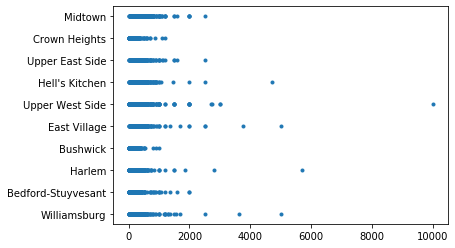

In [6]:
regions = collections.Counter(data['neighbourhood_cleansed'])
sort_r = sorted(regions.items(), key = lambda x: x[1],reverse = True)[:10]
x_plt = []
y_plt = []
for i in range(len(sort_r)):
    price = data['price']
    regs = data['neighbourhood_cleansed']
    idxs = [regs==sort_r[i]]
    s= list(price[regs == sort_r[i][0]])
    x_plt += s
    y_plt += [sort_r[i][0]]*len(s)

print(len(x_plt),len(y_plt))
plt.plot(x_plt,y_plt,".")

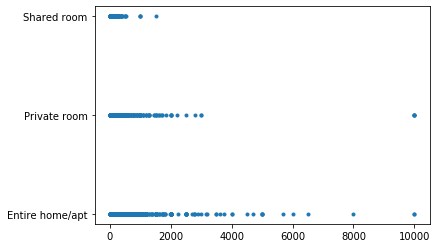

In [7]:
beds = data['room_type']
price = data['price']
plt.plot(price,beds,".")

# PCA using one HOT encoding

In [8]:
new_data = data[['price',
           'room_type',
           'accommodates',
           'review_scores_rating',
           'neighbourhood_cleansed']]
new_data = new_data[tmp>0]

In [9]:
lb_nh = LabelEncoder() # neighbour
lb_rt = LabelEncoder()  # room type
lb_ac = LabelEncoder() # accommodates
lb_rr = LabelEncoder() # review score rating

In [10]:
oh_neighborhood = pd.get_dummies(new_data.neighbourhood_cleansed).astype(int)
oh_room_type = pd.get_dummies(new_data.room_type).astype(int)
oh_accommodates = pd.get_dummies(new_data.accommodates).astype(int)
oh_review_scores_rating = pd.get_dummies(new_data.review_scores_rating).astype(int)

In [11]:
le_neighborhood = lb_nh.fit_transform(new_data["neighbourhood_cleansed"])
le_room_type = lb_rt.fit_transform(new_data['room_type'])
le_accommodates =  lb_rt.fit_transform(new_data['accommodates'])
le__review_scores_rating =  lb_rt.fit_transform(new_data['review_scores_rating'])

In [12]:
new_data = new_data.drop(['room_type','neighbourhood_cleansed','accommodates','review_scores_rating'], axis = 1)
le_data = pd.DataFrame(new_data)

In [13]:
le_neighborhood = pd.DataFrame(le_neighborhood)
le_room_type = pd.DataFrame(le_room_type)
le_accommodates = pd.DataFrame(le_accommodates)
le__review_scores_rating = pd.DataFrame(le__review_scores_rating)

In [14]:
le_data = pd.concat((new_data, le_room_type, le_neighborhood,le_accommodates,le__review_scores_rating), axis = 1)

In [15]:
le_data.columns = ['price',
           'room_type',
           'accommodates',
           'review_scores_rating',
           'neighbourhood_cleansed']
le_data = le_data[tmp>0]

C:\Apps\anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [16]:
new_data = pd.concat((new_data, oh_room_type, oh_neighborhood,oh_accommodates,oh_review_scores_rating), axis = 1)

In [18]:
le_data = le_data.dropna(axis=0, how='any')

In [19]:
new_data = new_data[:le_data.shape[0]]

In [25]:
new_data.head()
new_data.to_csv("output.csv")

In [26]:
le_data.head()

,price,room_type,accommodates,review_scores_rating,neighbourhood_cleansed
1,50.0,0.0,33.0,2.0,45.0
2,125.0,1.0,33.0,3.0,47.0
5,69.0,0.0,33.0,1.0,47.0
6,150.0,0.0,33.0,1.0,49.0
7,101.0,0.0,33.0,3.0,37.0


In [27]:
y = new_data['price']
X = new_data.drop(['price'],axis=1)

In [28]:
X_std = StandardScaler().fit_transform(X)

In [29]:
pca = PCA(n_components = 30)

In [30]:
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [132]:
print('Components:\n ', pca.components_)
print('Explained Variance Ratio:\n ', pca.explained_variance_ratio_)

Components:
  [[ 0.56882401 -0.55787517 -0.03877282 ...  0.0104612   0.01173609
  -0.03658751]
 [-0.09318486  0.00632529  0.28064613 ... -0.05027515 -0.0584203
   0.11362305]
 [ 0.06930489 -0.05449015 -0.04819258 ... -0.08170919 -0.07456746
   0.68524868]
 ...
 [-0.00175001 -0.00148068  0.010428   ... -0.05565171  0.01138709
  -0.00652182]
 [-0.00936961  0.00886196  0.00169405 ...  0.05822792  0.00540715
  -0.00799385]
 [ 0.00707457  0.00137008 -0.02727283 ...  0.0401469   0.01059509
  -0.00134091]]
Explained Variance Ratio:
  [0.01049535 0.00577208 0.00511449 0.00447475 0.00440411 0.00436534
 0.00434308 0.00428944 0.00426857 0.00422517 0.00419477 0.00417717
 0.00415408 0.00414091 0.0041244  0.00411953 0.00407084 0.00406079
 0.00405333 0.00404633 0.00402984 0.00401241 0.00400448 0.00400171
 0.00399035 0.00397855 0.00397596 0.00396774 0.00396174 0.00394318]


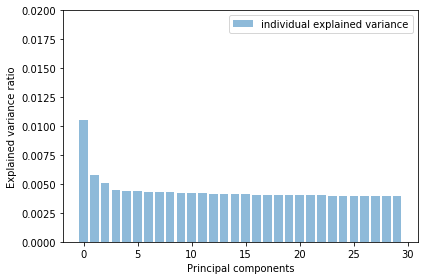

In [133]:
#plot explained variance 
plt.bar(range(pca.explained_variance_ratio_.shape[0]), pca.explained_variance_ratio_, alpha = 0.5, 
        align = 'center', label = 'individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.ylim(0, 0.02)
plt.legend(loc = 'best')
plt.tight_layout()

In [134]:
y = le_data['price']
X = le_data.drop(['price'],axis=1)
#standarize the dataset
X_std = StandardScaler().fit_transform(X)

# call PCA specifying we only want the

pca = PCA(n_components =4)
pca.fit(X_std)

# important information
print('Components:\n ', pca.components_)
print('Explained Variance Ratio:\n ', pca.explained_variance_ratio_)

Components:
  [[-0.70925029  0.06862287  0.70086701  0.03225457]
 [ 0.06115502 -0.67503154  0.16099556 -0.71740708]
 [ 0.02279235  0.72711395 -0.01656023 -0.68593846]
 [ 0.7019292   0.10454007  0.69468815  0.11736762]]
Explained Variance Ratio:
  [0.36656383 0.2577813  0.24471639 0.13093849]


In [135]:
s1 = sum(pca.explained_variance_ratio_[:3])
s2 = sum(pca.explained_variance_ratio_[3:])

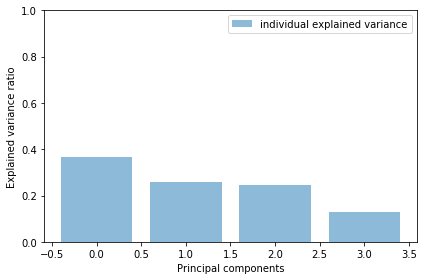

In [136]:
plt.bar(range(pca.explained_variance_ratio_.shape[0]), pca.explained_variance_ratio_, alpha = 0.5, 
        align = 'center', label = 'individual explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.ylim(0, 1)
plt.legend(loc = 'best')
plt.tight_layout()